In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
# Defining Data
N = 1000
p = 0.8

y_true = np.random.choice([0, 1], (N, 1), p=[p, 1-p])
y_prob = np.random.uniform(0.0, 1.0, (N, 1))

In [115]:
def get_tpr(y_true, y_prob, threshold):
    y_pred = np.where(y_prob > threshold, 1, 0)
    tp = np.logical_and(y_pred == 1, y_true == 1).sum()
    fn = np.logical_and(y_pred == 0, y_true == 1).sum()
    tpr = tp / (tp + fn)
    return tpr

def get_fpr(y_true, y_prob, threshold):
    y_pred = np.where(y_prob > threshold, 1, 0)
    tp = np.logical_and(y_pred == 1, y_true == 1).sum()
    fp = np.logical_and(y_pred == 1, y_true == 0).sum()
    fpr = fp / (fp + tp)
    return fpr

In [116]:
# Get FPR and TPR
FPR = [get_fpr(y_true, y_prob, threshold) for threshold in np.arange(0, 1, 0.01)]
TPR = [get_tpr(y_true, y_prob, threshold) for threshold in np.arange(0, 1, 0.01)]

# Sort Data
sort_idx = np.argsort(FPR)
FPR = np.array(FPR)[sort_idx]
TPR = np.array(TPR)[sort_idx]

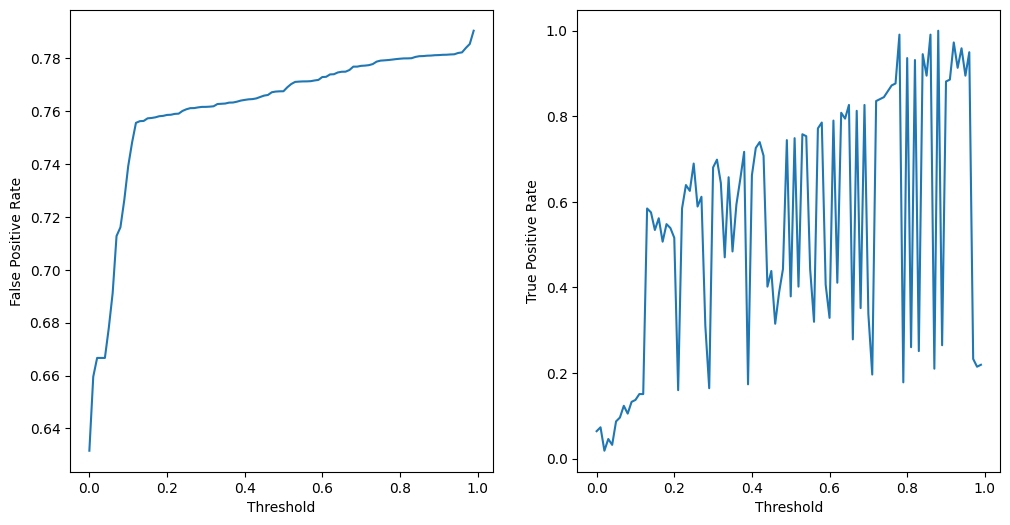

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(np.arange(0, 1, 0.01), FPR)
ax[1].plot(np.arange(0, 1, 0.01), TPR)
ax[0].set_ylabel('False Positive Rate')
ax[0].set_xlabel('Threshold')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('Threshold')
plt.show()

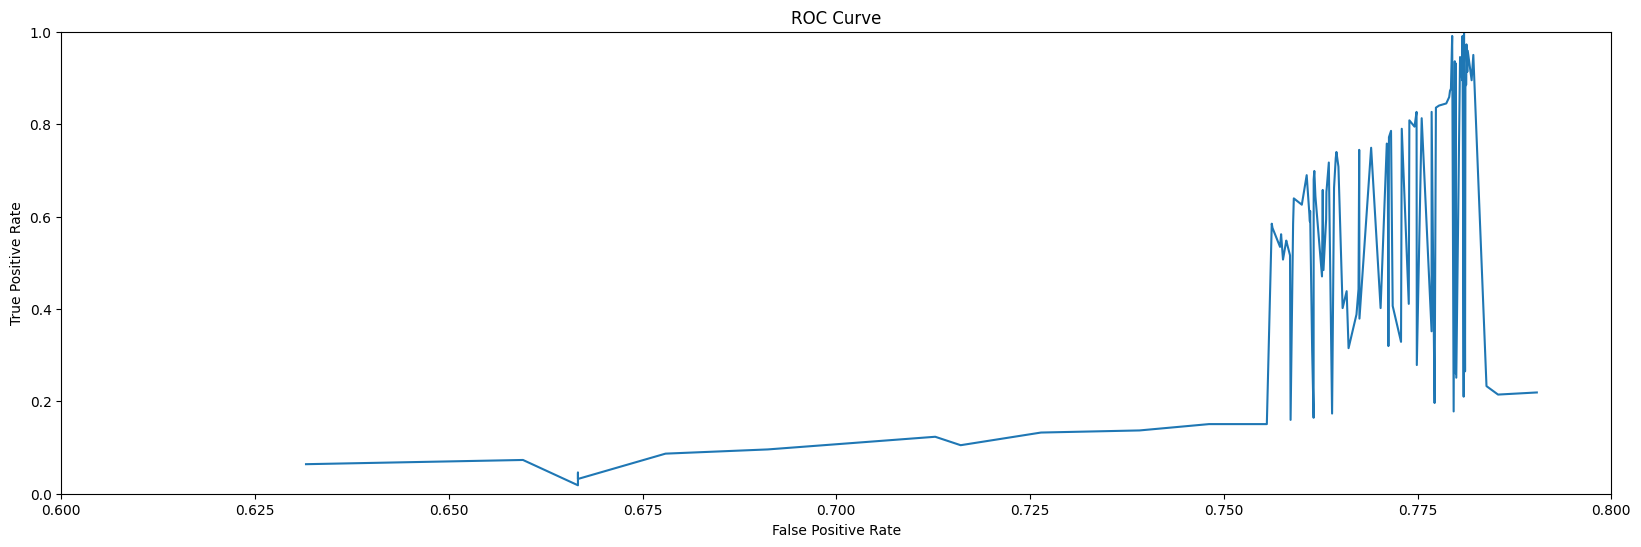

In [121]:
plt.figure(figsize=(20, 6))
plt.plot(FPR, TPR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0.6, 0.8)
plt.ylim(0, 1)
plt.title('ROC Curve')
plt.show()

In [122]:
# Manual Implemntation of trapezoidal Rule
area = 0

for i in range(1, len(FPR)):
    area += 0.5 * (TPR[i] + TPR[i-1]) * (FPR[i] - FPR[i-1])

area

0.03043348120936012

In [123]:
# Numpy Implemntation of trapezoidal rule
np.trapz(TPR, FPR)

0.030433481209360118

In [129]:
# Sklearn's Implemntation of AUC
from sklearn.metrics import auc
auc(FPR, TPR)

0.030433481209360118